In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
hour_bike = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fiverr_projects/Michael/Bike-Sharing-Dataset/hour.csv")
day_bike = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fiverr_projects/Michael/Bike-Sharing-Dataset/day.csv")

In [4]:
print('the shape of hourly bike ride {} \n and daily bike ride {}'.format(hour_bike.shape, day_bike.shape))

the shape of hourly bike ride (17379, 17) 
 and daily bike ride (731, 16)


In [5]:
hour_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
hour_bike.duplicated().sum()

0

In [20]:
hour_bike['cnt'].nunique()   #-> classification  categorical crossentropy

869

In [6]:
hour_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


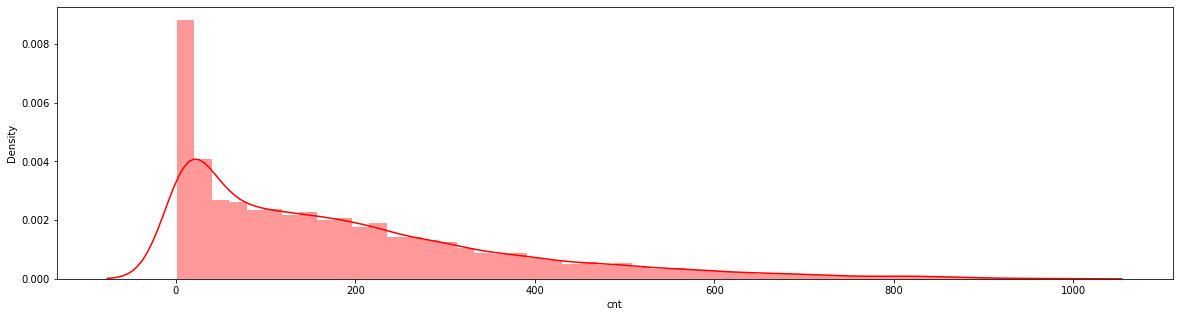

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(20,5))
sns.distplot(hour_bike['cnt'], color ='red')

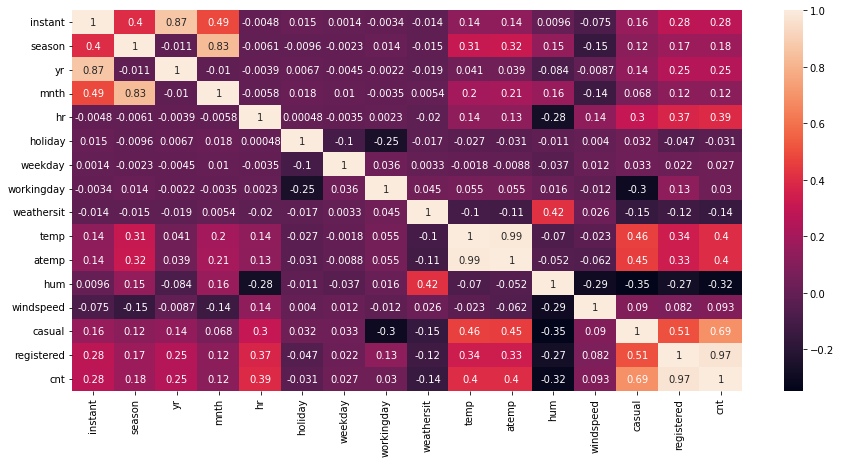

In [9]:
import seaborn as sns

corr = hour_bike.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, annot_kws={'size':10})

Train test split

In [10]:
#specify our features and targets
X = hour_bike.drop(['instant', 'dteday', 'cnt'], axis=1)
y = hour_bike['cnt']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ANN

In [12]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping


# define the model  -  layers sequence by sequence
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                480       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [14]:
# compile the model
model.compile(loss='mean_squared_error', optimizer='adam',  metrics = ["acc"])

In [15]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 7)

In [16]:
# train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[earlystopping])

Epoch 1/100
435/435 [==============================] - 3s 5ms/step - loss: 12838.5059 - acc: 0.0083 - val_loss: 13.2043 - val_acc: 0.0112
Epoch 2/100
435/435 [==============================] - 3s 6ms/step - loss: 4.1874 - acc: 0.0086 - val_loss: 2.4980 - val_acc: 0.0112
Epoch 3/100
435/435 [==============================] - 2s 5ms/step - loss: 2.3432 - acc: 0.0086 - val_loss: 2.1884 - val_acc: 0.0112
Epoch 4/100
435/435 [==============================] - 2s 5ms/step - loss: 2.0688 - acc: 0.0085 - val_loss: 2.0797 - val_acc: 0.0112
Epoch 5/100
435/435 [==============================] - 3s 7ms/step - loss: 1.8538 - acc: 0.0086 - val_loss: 1.7222 - val_acc: 0.0112
Epoch 6/100
435/435 [==============================] - 1s 2ms/step - loss: 1.6493 - acc: 0.0086 - val_loss: 1.6120 - val_acc: 0.0112
Epoch 7/100
435/435 [==============================] - 1s 2ms/step - loss: 1.4775 - acc: 0.0086 - val_loss: 1.3142 - val_acc: 0.0112
Epoch 8/100
435/435 [==============================] - 2s 4ms/st